<a href="https://colab.research.google.com/github/fidols/CA01/blob/main/CA01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd

In [45]:
#start of part 1
df = pd.read_csv('https://github.com/ArinB/MSBA-CA-Data/raw/main/CA01/house-price-train.csv')

In [10]:
df.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [7]:
df.shape

(1460, 81)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

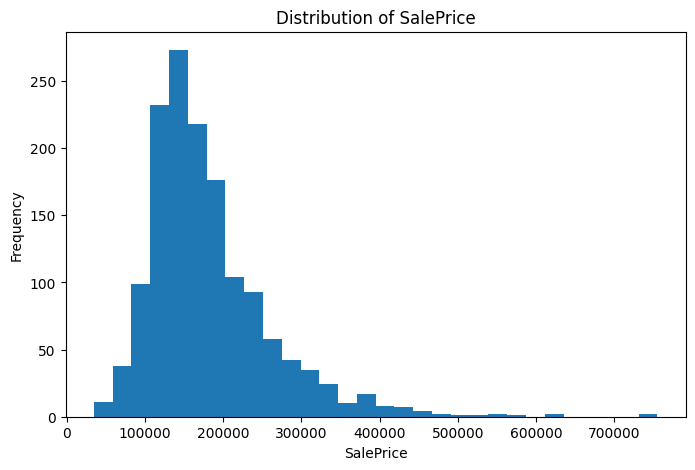

In [30]:
import matplotlib.pyplot as plt
#chat assisted to write this code
#saleprice is right skewed
#some incredibly high priced houses abou the 400000k mark that will likely be our outliers later
plt.figure(figsize=(8,5))
plt.hist(df['SalePrice'], bins=30)
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.title("Distribution of SalePrice")
plt.show()


In [33]:
df.duplicated().sum() #no duplicate values to deal with

np.int64(0)

In [40]:
df.isna().sum() #a lot of missing values in LotFrontage

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [46]:
df.isna().sum()/len(df)*100 #17%, will be dealing with LotFrontage in part 2

,0
Id,0.000000
MSSubClass,0.000000
MSZoning,0.000000
LotFrontage,17.739726
LotArea,0.000000
...,...
MoSold,0.000000
YrSold,0.000000
SaleType,0.000000
SaleCondition,0.000000


In [9]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [47]:
#starting part 2 data cleaning
#only LotFrontage had missing values so i did not feel the need to address categorical variables as a bulk.
#did not use mean because we obviously have extremely high outliers that would not be ignorewd by the mean
#the median provides a better demonstration of the neighborhood and normal values we'd likely see
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())



In [48]:
df.isna().sum()/len(df)*100 #no more missing numeric values

,0
Id,0.0
MSSubClass,0.0
MSZoning,0.0
LotFrontage,0.0
LotArea,0.0
...,...
MoSold,0.0
YrSold,0.0
SaleType,0.0
SaleCondition,0.0


In [49]:
print(df['LotFrontage'])

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64


In [36]:
df.isna().sum()


,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


<Axes: >

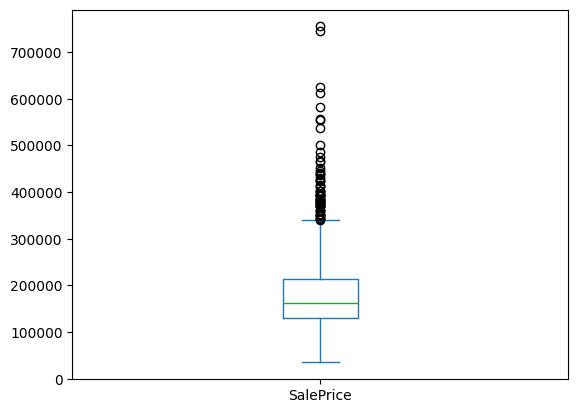

In [29]:
df['SalePrice'].plot.box()
#as seen in our histogram from part 1, there are a lot of outliers which are caused by the oddly highly priced houses
#this is very common, however, in real estate so I will not be deleting or manipulating them

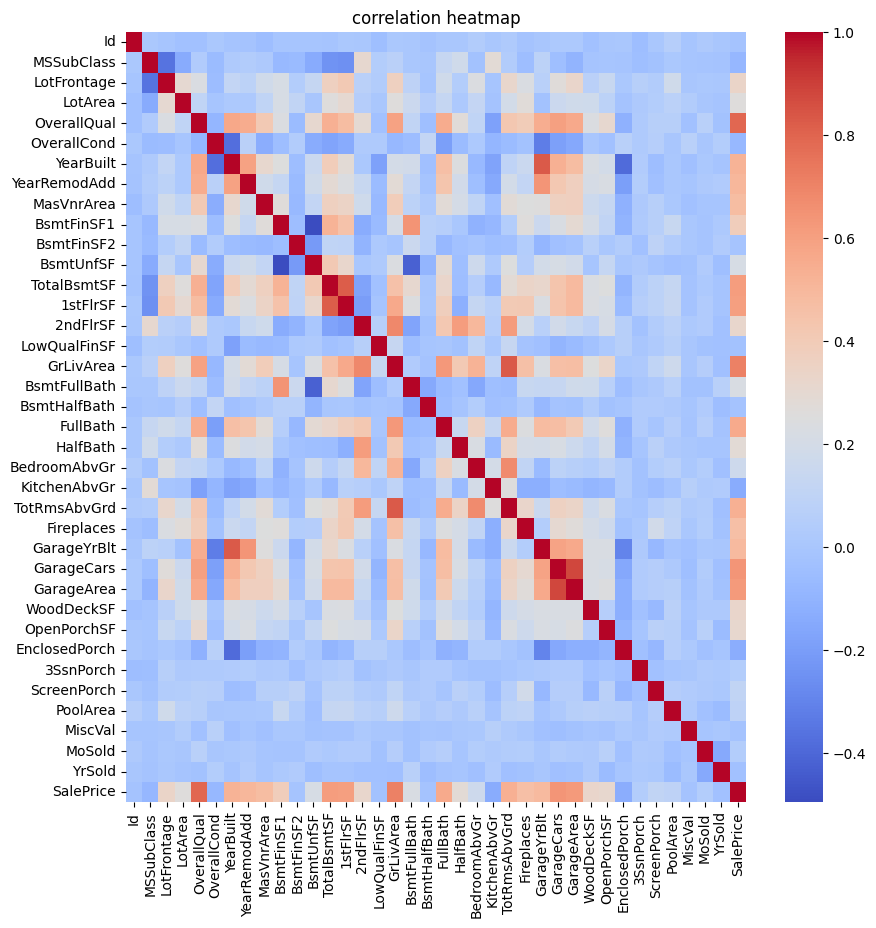

In [51]:
#part 3 making the multicollinearity heatmap
import seaborn as sns
import matplotlib.pyplot as plt

corr= df.corr(numeric_only= True)
#had to use chat because I did this without numeric_only and code didnt work

plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='coolwarm')
plt.title('correlation heatmap')
plt.show()

The first high correlation I noticed was garageArea with GarageCars, I am assuming this is size of the garage to the number of cars, which makes sense, more garage space leads to more cars.

The second I had to do research on, this is 1stFlrSF and TotalBsmtSF, this is a high correlation because first floor sizes are scaled to their basements, so the larger one is, the other will too!

Since we are focusing on SalePrice, the two highest correlations we have here are OverallQual which I can only assume refers to the overall quality that the house is in, so the higher the price the higher the quality of the house. Secondly, slightly lower than overall quality but still significant, is GrLivArea, which I had to look up and refers to the above ground living area, or the total square footage of livable space above ground level which excludes basements, garages and porches. But it instead focuses on living rooms, bedrooms, kitches etc. This is an important variable because obviously the more living space a house has, the more expensive it will be!
